# Importing Libraries
Numpy, Pandas, Matplotlib(pyplot) and fbprophet (Facebook's API used for prediction and forecasts.)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/INFY.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-22,9.06,9.07,8.98,9.05,8.829580,5827800
1,2020-05-26,9.17,9.20,8.92,9.07,8.849093,8686400
2,2020-05-27,9.20,9.39,9.19,9.35,9.122274,10198100
3,2020-05-28,9.37,9.41,9.17,9.19,8.966169,12831000
4,2020-05-29,9.04,9.14,8.98,9.10,9.002776,7768600


# Visualization of the "Close" column.

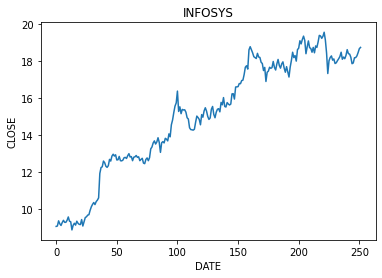

In [8]:
close=data['Close']
ax=close.plot(title="INFOSYS")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

We only need two columns from this dataset which are date and close.

In [9]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

We are using Facebook Prophet model,  for predicting the stock prices of Tesla

In [10]:
data=data.rename(columns={"Date":"ds","Close":"y"})

# Prediction

In [14]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-17,18.685639,13.995679,23.498496
613,2022-05-18,18.694232,14.006328,23.445090
614,2022-05-19,18.665445,14.042412,23.376650
615,2022-05-20,18.703297,14.180763,23.487719
616,2022-05-21,19.046286,14.179603,23.931653


# Visualizing the predicted model

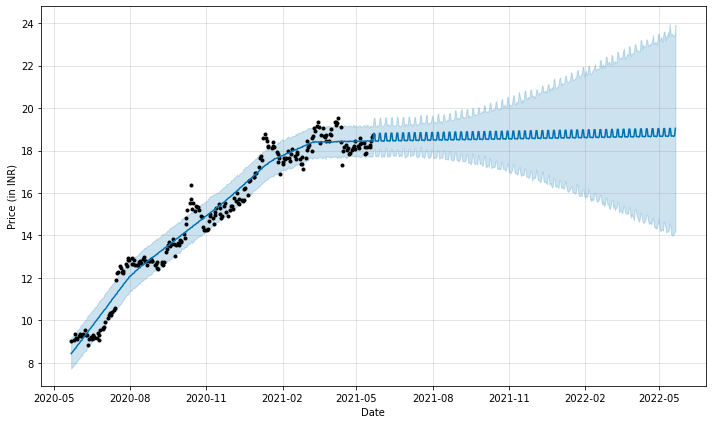

In [15]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price (in INR)")